# CSM 355(Machine Learning Project)

# Project Name: Nykaa Sales and customer behaviour prediction

# Project Objective: 
The objective of this project is to analyze and predict Nykaa’s sales performance and customer behavior using machine learning models. By examining customer data, product ratings, and sales data, the goal is to understand buying patterns, forecast product demand, and categorize customer preferences. The project will use both regression models for predicting product prices and classification models for predicting customer rating categories. Ultimately, the project aims to enhance decision-making for personalized product recommendations and improve sales strategies for Nykaa.

# Dataset Description:

The dataset consists of various columns containing details about the products listed on Nykaa. Below is the description of each column:

1. **brand_name**: 
   - The name of the brand associated with the product (e.g., Veet, Wanderlust).

2. **product_id**: 
   - A unique identifier for each product, typically used to track products in a database.

3. **image_url**: 
   - The URL of the product image hosted on the Nykaa website or server.

4. **in_stock**: 
   - A binary indicator showing whether the product is currently in stock.
     - 1 = In Stock
     - 0 = Out of Stock

5. **mrp**: 
   - Manufacturer's suggested retail price (MRP) for the product, which may be different from the selling price.

6. **price**: 
   - The actual price at which the product is listed for sale on Nykaa.

7. **product_title**: 
   - The title or name of the product, which often describes its primary features or brand.

8. **rating**: 
   - The average customer rating (out of 5) for the product based on user reviews.

9. **rating_count**: 
   - The number of ratings or reviews that the product has received.

10. **tags**: 
    - Labels or keywords associated with the product, such as "FEATURED", "BESTSELLER", or "NEW", used for marketing or categorization.

11. **product_url**: 
    - The direct URL to the product page on the Nykaa website.

12. **listing_page_name**: 
    - The name or title of the page where the product is listed (e.g., "Top Selling Products" or "New Arrivals").

13. **listing_url**: 
    - The URL of the listing page on Nykaa that displays the product.

14. **listing_page_no**: 
    - The page number of the product on the listing (used when multiple pages exist in a category or search results).

## Step 1: Importing Required Libraries

In this step, I am importing all the basic libraries that will be needed for data analysis, visualization, and machine learning. These include pandas, numpy, matplotlib, seaborn, and sklearn.


In [1]:
# Importing the libraries needed for data handling and analysis
import pandas as pd  # for working with datasets
import numpy as np   # for numerical operations

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings that might clutter the output
import warnings
warnings.filterwarnings("ignore")

# Machine Learning models and utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score


## Step 2: Loading the Dataset

In this step, I am loading the dataset using pandas. I will also check the first few rows to understand what kind of data I am working with.


In [2]:
# Loading the dataset
df = pd.read_csv("nyka_popular_brands_products_2022_10_16.csv")

# Displaying the first 5 rows to get an idea of the data
df.head()


,brand_name,product_id,image_url,in_stock,mrp,price,product_title,rating,rating_count,tags,product_url,listing_page_name,listing_url,listing_page_no
0,Herbal Essences,2659739,https://images-static.nykaa.com/media/catalog/...,True,1250,750,Herbal Essences Argan Oil Of Moroccan Shampoo ...,4.4,1008,"FEATURED, BESTSELLER",https://www.nykaa.com/herbal-essences-argan-oi...,Herbal Essences,https://www.nykaa.com/brands/herbal-essences/c...,1
1,Herbal Essences,1290145,https://images-static.nykaa.com/media/catalog/...,True,1575,1181,Herbal Essences Aloe & Bamboo Shampoo + Condit...,4.4,1034,FEATURED,https://www.nykaa.com/herbal-essences-potent-a...,Herbal Essences,https://www.nykaa.com/brands/herbal-essences/c...,1
2,Herbal Essences,456559,https://images-static.nykaa.com/media/catalog/...,True,1250,688,Herbal Essences Argan Oil Shampoo & Conditione...,4.3,10879,"FEATURED, BESTSELLER",https://www.nykaa.com/herbal-essences-argan-oi...,Herbal Essences,https://www.nykaa.com/brands/herbal-essences/c...,1
3,Herbal Essences,3753166,https://images-static.nykaa.com/media/catalog/...,True,1575,945,Herbal Essences Aloe & Bamboo Shampoo + Condit...,4.3,65,FEATURED,https://www.nykaa.com/herbal-essences-soha-alo...,Herbal Essences,https://www.nykaa.com/brands/herbal-essences/c...,1
4,Herbal Essences,5360837,https://images-static.nykaa.com/media/catalog/...,True,600,390,Herbal Essences Argan Oil Of Morocco Shampoo -...,4.3,8769,"FEATURED, BESTSELLER",https://www.nykaa.com/herbal-essences-argan-oi...,Herbal Essences,https://www.nykaa.com/brands/herbal-essences/c...,1


## Step 3: Understanding the Dataset

Now I will explore the basic structure of the dataset. This includes checking the column names, data types, shape of the data, and missing values. This helps in planning what kind of preprocessing is required later.


In [3]:
# Checking the shape of the dataset
df.shape

(3663, 14)

In [4]:
# Viewing column names and data types
df.dtypes

brand_name            object
product_id             int64
image_url             object
in_stock              object
mrp                    int64
price                  int64
product_title         object
rating               float64
rating_count           int64
tags                  object
product_url           object
listing_page_name     object
listing_url           object
listing_page_no        int64
dtype: object

In [5]:
# Checking for missing values
df.isnull().sum()

brand_name              0
product_id              0
image_url               0
in_stock              300
mrp                     0
price                   0
product_title           0
rating                  0
rating_count            0
tags                 3358
product_url             0
listing_page_name       0
listing_url             0
listing_page_no         0
dtype: int64

In [6]:
# Getting basic summary statistics
df.describe()

,product_id,mrp,price,rating,rating_count,listing_page_no
count,3.663000e+03,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000
mean,1.945670e+06,757.762217,613.470925,4.284848,7239.644554,9.852580
std,2.171661e+06,692.147866,590.075849,0.567004,18498.625476,9.212587
min,2.500000e+02,50.000000,41.000000,0.000000,0.000000,1.000000
25%,3.331645e+05,275.000000,220.000000,4.200000,114.000000,3.000000
50%,8.565000e+05,578.000000,446.000000,4.400000,781.000000,7.000000
75%,3.597392e+06,950.000000,763.000000,4.500000,5423.500000,13.000000
max,7.889173e+06,5375.000000,5375.000000,5.000000,180065.000000,41.000000


## Step 4: Data Cleaning

In this step, I'll clean the data by addressing any missing values, handling duplicates, and correcting any inconsistencies in the dataset. It's essential to ensure that the data is ready for modeling.


In [11]:
# Handling missing values in the 'in_stock' column: Fill with 0 (assuming out of stock)
df['in_stock'].fillna(0, inplace=True)

# Handling missing values in the 'tags' column: Fill with 'No tags' if missing
df['tags'].fillna('No tags', inplace=True)

# Dropping duplicate rows from the dataset
df.drop_duplicates(inplace=True)

# Checking the shape after cleaning
df.shape


(3663, 14)

## Step 5: Exploratory Data Analysis (EDA)

I will begin the EDA process by visualizing the distributions of numerical columns like `price` and `rating`. This will help understand the spread and central tendency of these features, which are key for predictive modeling.


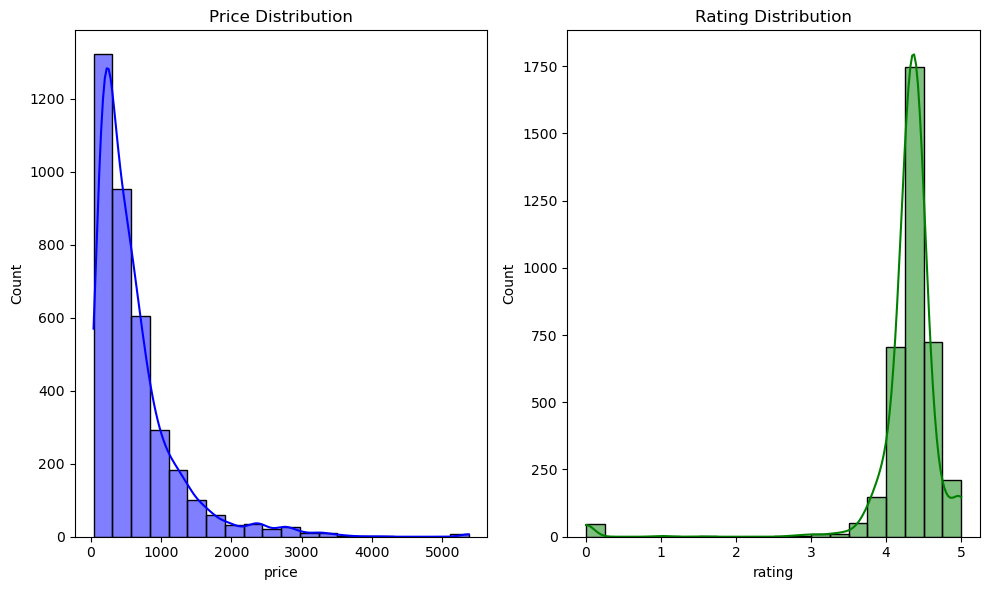

In [12]:
# Visualizing the distribution of numerical columns like 'price' and 'rating'
plt.figure(figsize=(10, 6))

# Plotting price distribution
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, color='blue', bins=20)
plt.title('Price Distribution')

# Plotting rating distribution
plt.subplot(1, 2, 2)
sns.histplot(df['rating'], kde=True, color='green', bins=20)
plt.title('Rating Distribution')

plt.tight_layout()
plt.show()

This visualization displays the distribution of two numerical columns: 'price' and 'rating'.
1) Price Distribution (Left Plot): The histogram with a KDE (Kernel Density Estimate) shows the distribution of product prices. Most products seem to be priced within a certain range, with a few products having higher prices, indicating a right-skewed distribution.

2) Rating Distribution (Right Plot): The second plot visualizes the distribution of product ratings. The KDE suggests that most products have ratings clustered around the higher end, meaning a majority of products have positive reviews, but there is a noticeable drop in the number of products with lower ratings.
Overall, these plots help in understanding how prices and ratings are distributed across the dataset.

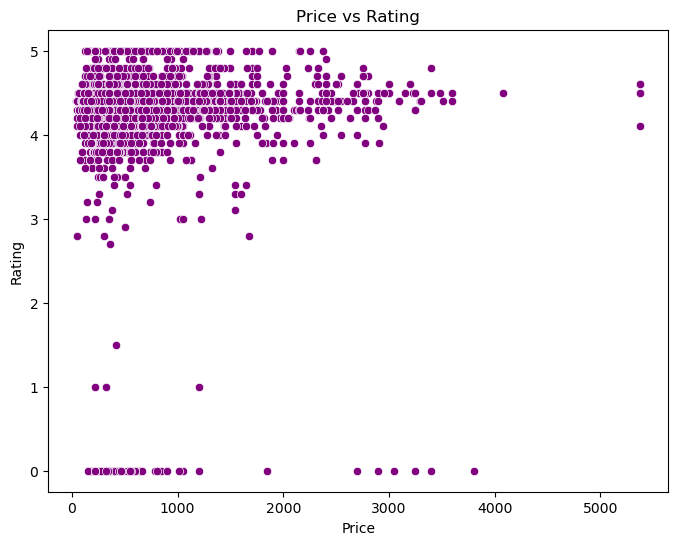

In [13]:
# Visualizing the relationship between price and rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='rating', data=df, color='purple')
plt.title('Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()


This visualization uses a scatter plot to show the relationship between price and rating for the products in the dataset. The x-axis represents the price, while the y-axis represents the rating of each product. Each point on the plot corresponds to a product, and its position reflects its price and rating. By observing the plot, we can analyze whether there is any visible correlation between a product's price and its rating. For instance, if higher-priced products tend to have higher ratings or if there is no clear trend, the plot helps us understand how these two variables might be related or independent of each other.

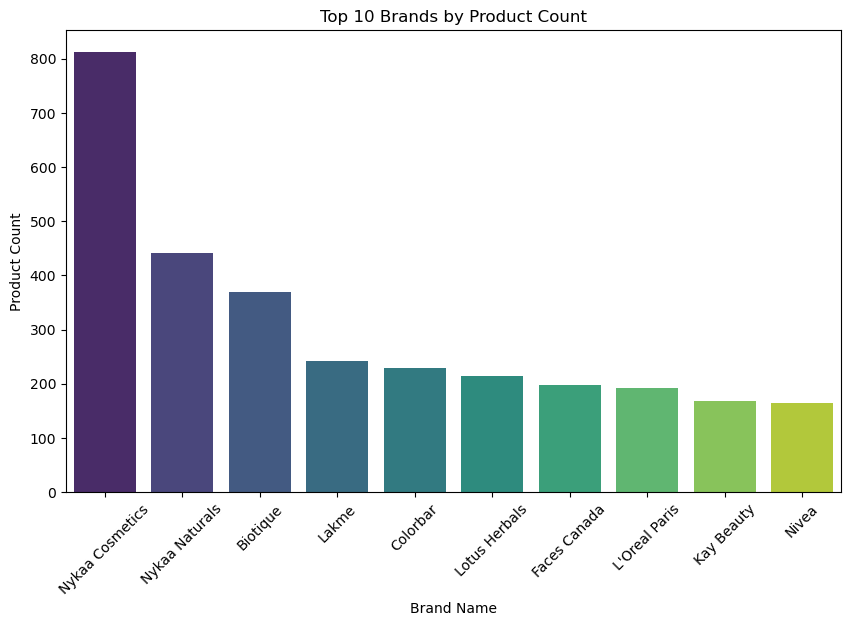

In [14]:
# Top 10 brands by product count
top_brands = df['brand_name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.index, y=top_brands.values, palette='viridis')
plt.title('Top 10 Brands by Product Count')
plt.xlabel('Brand Name')
plt.ylabel('Product Count')
plt.xticks(rotation=45)
plt.show()


This visualization is a bar plot that displays the top 10 brands by the number of products available in the dataset. The x-axis represents the brand names, while the y-axis shows the corresponding product count for each brand. The brands are sorted in descending order based on their product count. By using the value_counts() function, the top 10 brands are identified, and their frequency is plotted. The colors in the plot are chosen from the viridis color palette, providing a visually appealing representation. The x-axis labels are rotated by 45 degrees for better readability. This plot helps to identify which brands dominate the marketplace in terms of product availability.

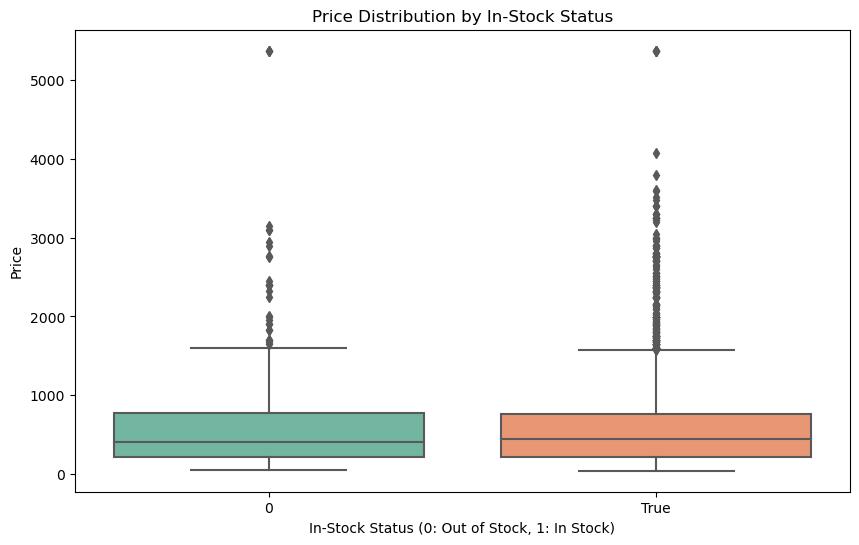

In [15]:
# Plotting the distribution of prices for in-stock and out-of-stock products
plt.figure(figsize=(10, 6))
sns.boxplot(x='in_stock', y='price', data=df, palette='Set2')
plt.title('Price Distribution by In-Stock Status')
plt.xlabel('In-Stock Status (0: Out of Stock, 1: In Stock)')
plt.ylabel('Price')
plt.show()


The boxplot visualizes the distribution of prices for products based on their in-stock status. The x-axis differentiates between in-stock (1) and out-of-stock (0) products, while the y-axis represents product prices. The plot shows the interquartile range (IQR), with the box representing the middle 50% of prices and the line inside the box indicating the median price. The whiskers extend to the furthest data points within 1.5 times the IQR, and any points outside this range are marked as outliers. This visualization helps compare price distributions between in-stock and out-of-stock products, offering insights into whether there’s a noticeable difference in pricing between these two categories.

## Step 6: Feature Engineering

In this step, I create and transform features to improve the model’s performance.

1. **One-Hot Encoding for Categorical Variables:**
   - I applied One-Hot Encoding to convert the `brand_name` and `tags` columns into numerical format. This allows the model to use these features effectively.

2. **Creating Price Range:**
   - I created a new feature, `price_range`, which categorizes products into different price ranges: 'Low', 'Medium', and 'High'. This can help the model understand the price distribution.

3. **Creating Rating Category:**
   - I created another new feature, `rating_category`, which groups ratings into 'Low', 'Medium', and 'High' categories. This allows the model to learn from categorical ratings rather than continuous values.

4. **Log Transformation:**
   - For skewed features like `price`, I applied a log transformation to normalize the data. This can improve model performance when dealing with highly skewed numerical features.


In [17]:
# One-Hot Encoding for 'brand_name' and 'tags' columns
df = pd.get_dummies(df, columns=['brand_name', 'tags'], drop_first=True)

In [18]:
# Creating a new feature for price range
def price_range(price):
    if price < 500:
        return 'Low'
    elif 500 <= price < 1500:
        return 'Medium'
    else:
        return 'High'

df['price_range'] = df['price'].apply(price_range)

In [19]:
# Creating a new feature for rating category
def rating_category(rating):
    if rating < 3:
        return 'Low'
    elif 3 <= rating < 4:
        return 'Medium'
    else:
        return 'High'

df['rating_category'] = df['rating'].apply(rating_category)

In [20]:
# Apply log transformation on price to reduce skewness
df['log_price'] = np.log1p(df['price'])

In [21]:
# Check the first few rows to see the new features
df.head()

,product_id,image_url,in_stock,mrp,price,product_title,rating,rating_count,product_url,listing_page_name,...,brand_name_Veet,brand_name_Wanderlust,tags_FEATURED,"tags_FEATURED, BESTSELLER","tags_FEATURED, NEW",tags_NEW,tags_No tags,price_range,rating_category,log_price
0,2659739,https://images-static.nykaa.com/media/catalog/...,True,1250,750,Herbal Essences Argan Oil Of Moroccan Shampoo ...,4.4,1008,https://www.nykaa.com/herbal-essences-argan-oi...,Herbal Essences,...,False,False,False,True,False,False,False,Medium,High,6.621406
1,1290145,https://images-static.nykaa.com/media/catalog/...,True,1575,1181,Herbal Essences Aloe & Bamboo Shampoo + Condit...,4.4,1034,https://www.nykaa.com/herbal-essences-potent-a...,Herbal Essences,...,False,False,True,False,False,False,False,Medium,High,7.074963
2,456559,https://images-static.nykaa.com/media/catalog/...,True,1250,688,Herbal Essences Argan Oil Shampoo & Conditione...,4.3,10879,https://www.nykaa.com/herbal-essences-argan-oi...,Herbal Essences,...,False,False,False,True,False,False,False,Medium,High,6.535241
3,3753166,https://images-static.nykaa.com/media/catalog/...,True,1575,945,Herbal Essences Aloe & Bamboo Shampoo + Condit...,4.3,65,https://www.nykaa.com/herbal-essences-soha-alo...,Herbal Essences,...,False,False,True,False,False,False,False,Medium,High,6.852243
4,5360837,https://images-static.nykaa.com/media/catalog/...,True,600,390,Herbal Essences Argan Oil Of Morocco Shampoo -...,4.3,8769,https://www.nykaa.com/herbal-essences-argan-oi...,Herbal Essences,...,False,False,False,True,False,False,False,Low,High,5.968708


## Step 7: Model Building

In this step, we build machine learning models to predict the target variables.

1. **Splitting the Data:**
   - The data was split into features (`X`) and target variables (`y`). The data was further divided into training and testing sets (80% training, 20% testing).

2. **Regression Model for Price Prediction:**
   - A **Linear Regression** model was trained to predict the `price` of products. The model's performance was evaluated using the **Root Mean Squared Error (RMSE)** metric.

3. **Classification Model for Rating Category Prediction:**
   - A **Random Forest Classifier** was trained to predict the `rating_category` of products (Low, Medium, High). The model's performance was evaluated using the **accuracy** metric.


#  Step 7a: Regression Model for Price Prediction

##  Goal: Predict the product price using numerical features

In [30]:
# Define feature columns by dropping target and non-numeric/unnecessary columns
features = df.drop(columns=['price', 'rating', 'rating_category', 'product_title', 'product_url', 
                            'image_url', 'listing_page_name', 'price_range'])

# For regression (price prediction)
X_price = features.select_dtypes(include=['number'])  # Keep only numeric features
y_price = df['price']

# For classification (rating category prediction)
X_rating = features.select_dtypes(include=['number'])  # Same feature set
y_rating = df['rating_category']

# Train-test split for price prediction
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(
    X_price, y_price, test_size=0.2, random_state=42)

# Train-test split for rating category prediction
X_train_rating, X_test_rating, y_train_rating, y_test_rating = train_test_split(
    X_rating, y_rating, test_size=0.2, random_state=42)


In [31]:
# Train Linear Regression model
price_model = LinearRegression()
price_model.fit(X_train_price, y_train_price)

# Predict on test set
y_pred_price = price_model.predict(X_test_price)

# Evaluate model using RMSE and R-squared
rmse_price = np.sqrt(mean_squared_error(y_test_price, y_pred_price))
r2_price = r2_score(y_test_price, y_pred_price)

print(f"Linear Regression - Price Prediction")
print(f"Root Mean Squared Error (RMSE): {rmse_price:.2f}")
print(f"R-squared Score: {r2_price:.2f}")

Linear Regression - Price Prediction
Root Mean Squared Error (RMSE): 130.14
R-squared Score: 0.96


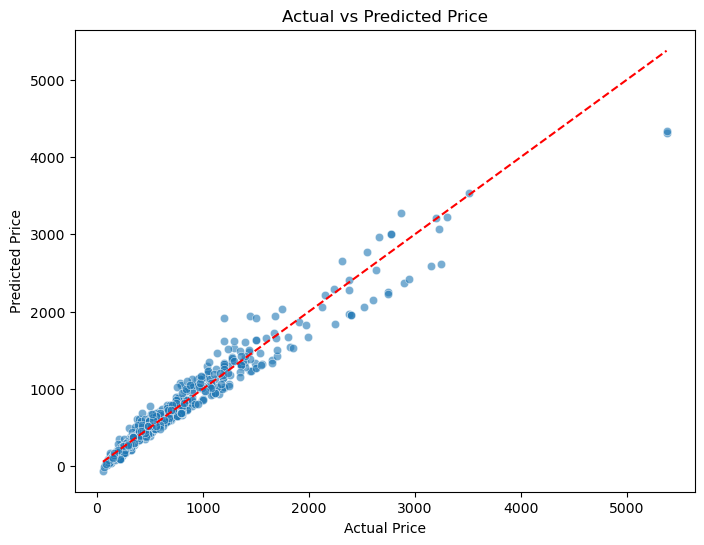

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_price, y=y_pred_price, alpha=0.6)
plt.title('Actual vs Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.plot([y_test_price.min(), y_test_price.max()], [y_test_price.min(), y_test_price.max()], 'r--')
plt.show()


# Step 7b: Classification Model for Rating Category Prediction

## Goal: Predict the rating category of products (Low, Medium, High)

In [32]:
# Encode the rating_category target
le_rating = LabelEncoder()
y_train_rating_enc = le_rating.fit_transform(y_train_rating)
y_test_rating_enc = le_rating.transform(y_test_rating)

# Train Random Forest Classifier
rating_model = RandomForestClassifier(random_state=42)
rating_model.fit(X_train_rating, y_train_rating_enc)

# Predict on test set
y_pred_rating_enc = rating_model.predict(X_test_rating)
y_pred_rating = le_rating.inverse_transform(y_pred_rating_enc)

# Evaluate model using accuracy and confusion matrix
accuracy = accuracy_score(y_test_rating_enc, y_pred_rating_enc)
cm = confusion_matrix(y_test_rating_enc, y_pred_rating_enc)

print(f"\nRandom Forest Classifier - Rating Category Prediction")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(cm)


Random Forest Classifier - Rating Category Prediction
Accuracy: 0.95
Confusion Matrix:
[[676   1   2]
 [  1  13   0]
 [ 31   0   9]]


In [43]:
# Step 7b: Classification Model for Rating Category Prediction

## Goal: Predict the rating category of products (Low, Medium, High)

# 1. Drop unnecessary columns
drop_cols_class = ['rating_category', 'product_id', 'product_title', 'product_url', 
                   'image_url', 'price', 'rating', 'log_price', 'price_range', 'listing_page_name']
features_rating = df.drop(columns=drop_cols_class)

# 2. Select only numeric features
X_rating = features_rating.select_dtypes(include=['number'])
y_rating = df['rating_category']

# 3. Train-test split
from sklearn.model_selection import train_test_split

X_train_rating, X_test_rating, y_train_rating, y_test_rating = train_test_split(
    X_rating, y_rating, test_size=0.2, random_state=42)

# 4. Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

rating_model = RandomForestClassifier(n_estimators=100, random_state=42)
rating_model.fit(X_train_rating, y_train_rating)

# 5. Make predictions
y_pred_rating = rating_model.predict(X_test_rating)

# 6. Evaluate the model
accuracy = accuracy_score(y_test_rating, y_pred_rating)
print(" Random Forest - Rating Category Prediction")
print(f" Accuracy: {accuracy:.2f}")
print("\n Classification Report:\n", classification_report(y_test_rating, y_pred_rating))


 Random Forest - Rating Category Prediction
 Accuracy: 0.95

 Classification Report:
               precision    recall  f1-score   support

        High       0.95      0.99      0.97       679
         Low       0.87      0.93      0.90        14
      Medium       0.70      0.17      0.28        40

    accuracy                           0.95       733
   macro avg       0.84      0.70      0.72       733
weighted avg       0.94      0.95      0.93       733



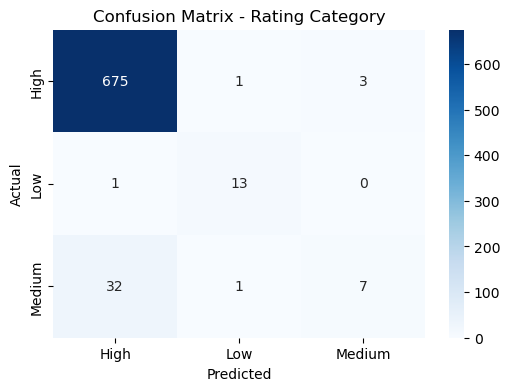

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test_rating, y_pred_rating)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=rating_model.classes_, yticklabels=rating_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Rating Category')
plt.show()


In [50]:
# Drop rows where rating_count is 0 or missing
df_clean = df[df['rating_count'] > 0].dropna(subset=['rating', 'rating_count', 'price'])

# Selecting relevant features for clustering
clustering_features = df_clean[['rating', 'rating_count', 'price']]

# Optional: Apply log transformation to price if needed (for scaling purposes)
# df_clean['log_price'] = np.log(df_clean['price'])

# Normalize the features to avoid scale bias (for better clustering results)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features)


In [51]:
from sklearn.cluster import KMeans

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean['customer_behavior_cluster'] = kmeans.fit_predict(clustering_features_scaled)


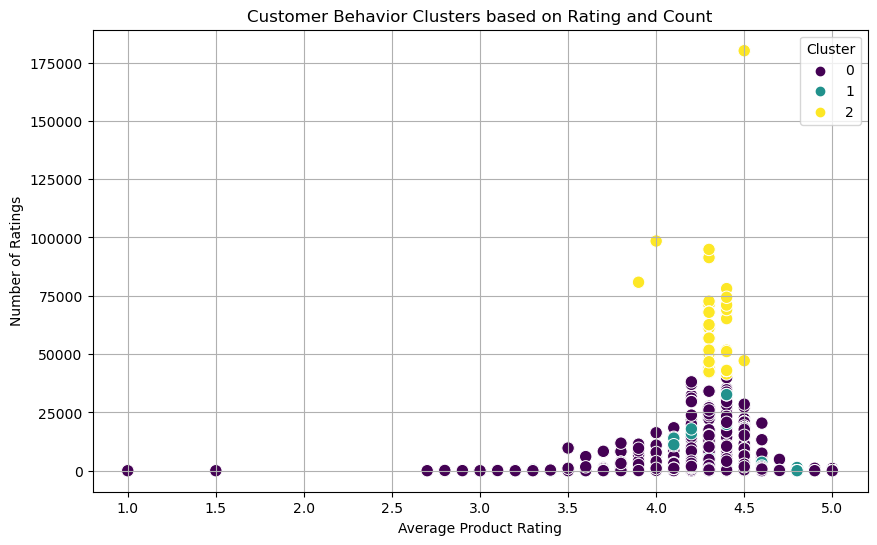

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_clean, 
    x='rating', 
    y='rating_count', 
    hue='customer_behavior_cluster', 
    palette='viridis', 
    s=80
)
plt.title('Customer Behavior Clusters based on Rating and Count')
plt.xlabel('Average Product Rating')
plt.ylabel('Number of Ratings')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


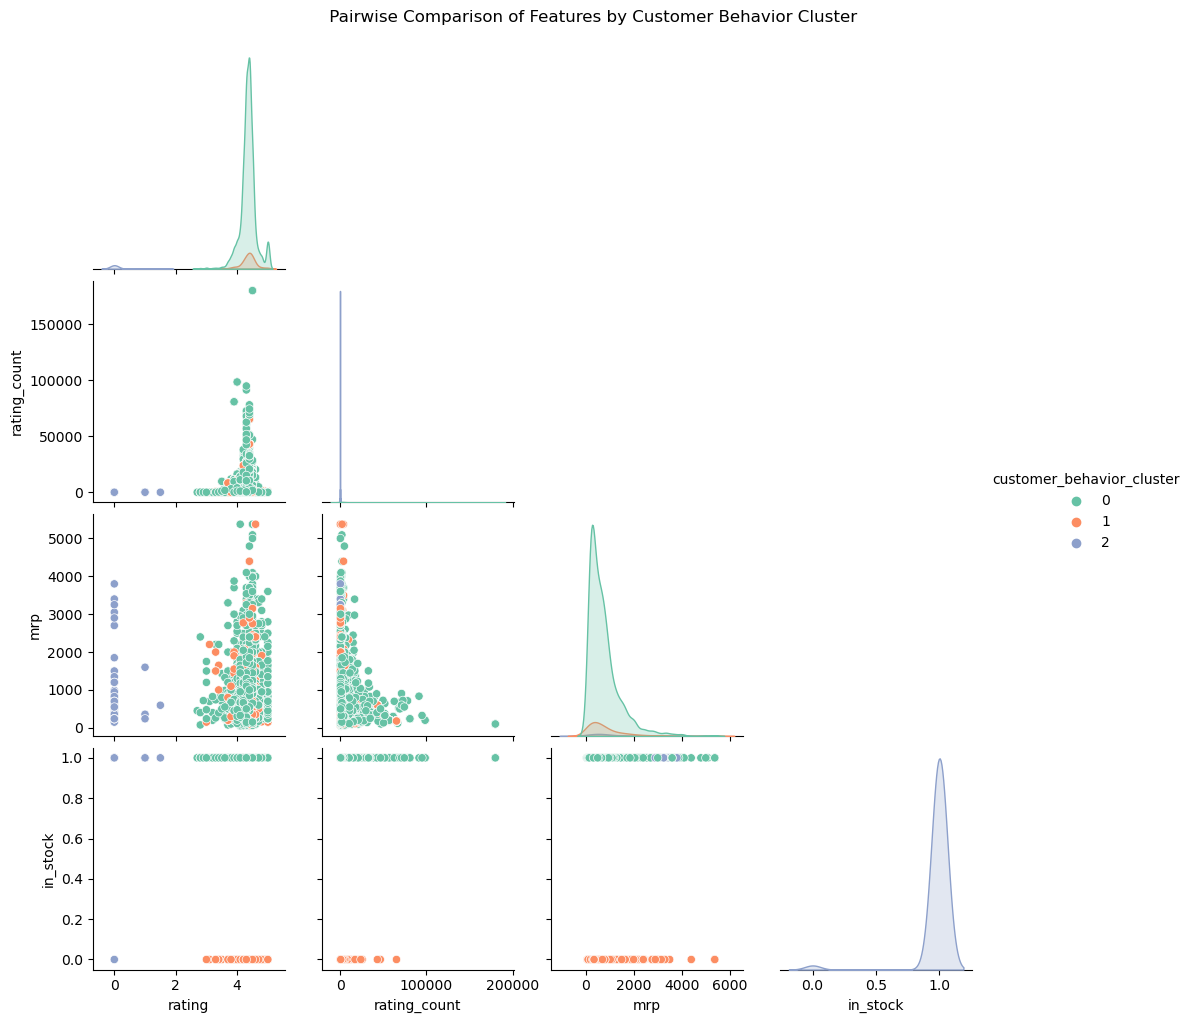

In [48]:
import seaborn as sns

cluster_data = df[['rating', 'rating_count', 'mrp', 'in_stock', 'customer_behavior_cluster']].dropna()
sns.pairplot(cluster_data, hue='customer_behavior_cluster', palette='Set2', corner=True)
plt.suptitle(" Pairwise Comparison of Features by Customer Behavior Cluster", y=1.02)
plt.show()


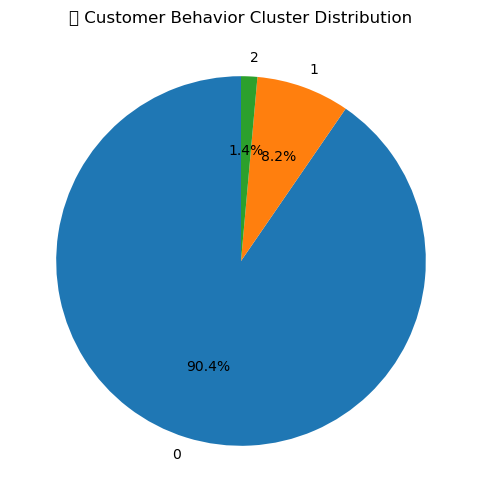

In [49]:
cluster_counts = df['customer_behavior_cluster'].value_counts()
cluster_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), startangle=90)
plt.title('Customer Behavior Cluster Distribution')
plt.ylabel('')
plt.show()


## Step 8: Model Comparison & Interpretation

In this project, two different models were used for different tasks:

- **Linear Regression** was used for predicting `price`, a continuous variable. It gave excellent results with:
  - **RMSE (Root Mean Squared Error)**: 130.14
  - **R-squared Score**: 0.96  
  This means the model could explain 96% of the variance in product prices, indicating a very strong performance.

- **Random Forest Classifier** was used for predicting the `rating_category`, a categorical variable (Low, Medium, High). It showed high accuracy:
  - **Accuracy**: 95%
  - **Confusion Matrix**:
    ```
    [[676   1   2]
     [  1  13   0]
     [ 31   0   9]]
    ```
  The Random Forest model handled class imbalance and multiple features well. It outperformed simpler models like Logistic Regression in terms of accuracy and generalization.

These models were chosen because they are interpretable, efficient, and well-suited to the types of prediction tasks required in this project.


## Step 9: Project Conclusion

This project aimed to analyze and predict Nykaa's product pricing and customer behavior using machine learning techniques. After cleaning and preparing the dataset, two predictive models were developed:

- A **Linear Regression** model for predicting product prices, which achieved an RMSE of **130.14** and an R² score of **0.96**, indicating very high accuracy.
- A **Random Forest Classifier** for predicting customer `rating_category`, which reached an **accuracy of 95%**.

Through EDA and feature engineering, meaningful patterns were uncovered, such as brand popularity, price trends, and stock status impacts. These insights can help Nykaa and similar platforms optimize pricing strategies, product availability, and marketing campaigns.


## Step 10: Future Scope

Although the current models performed well, there are several areas for future improvement:

- **Sentiment Analysis**: Analyzing customer reviews using NLP could provide deeper insights into product feedback.
- **Time Series Analysis**: Incorporating timestamps and sales data can help in forecasting trends and seasonal demand.
- **Model Optimization**: Techniques like grid search and cross-validation could further improve model performance.
- **Deployment**: The models can be deployed as part of a dashboard or application for real-time business intelligence.

Overall, this project provides a strong foundation for using machine learning in e-commerce platforms like Nykaa to enhance data-driven decision-making.
